# NBA Predictor - Exploratory Data Analysis

This notebook explores the NBA games dataset to understand:
- Data quality and completeness
- Temporal patterns
- Team distributions
- Home advantage
- Score distributions

## 1. Setup and Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')
from nba_predictor import config

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load Raw Data

In [3]:
# Load dataset
df = pd.read_csv(config.RAW_DATA_FILE)
df[config.GAME_DATE_COL] = pd.to_datetime(df[config.GAME_DATE_COL])

print(f"Dataset shape: {df.shape}")
print(f"Date range: {df[config.GAME_DATE_COL].min().date()} to {df[config.GAME_DATE_COL].max().date()}")

Dataset shape: (26651, 21)
Date range: 2003-10-05 to 2022-12-22


In [4]:
# Display first few rows
df.head(10)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
5,2022-12-21,22200469,Final,1610612738,1610612754,2022,1610612738,112.0,0.386,0.840,...,26.0,62.0,1610612754,117.0,0.469,0.778,0.462,27.0,47.0,0
6,2022-12-21,22200470,Final,1610612751,1610612744,2022,1610612751,143.0,0.643,0.875,...,42.0,32.0,1610612744,113.0,0.494,0.760,0.364,32.0,36.0,1
7,2022-12-21,22200471,Final,1610612752,1610612761,2022,1610612752,106.0,0.553,0.611,...,25.0,38.0,1610612761,113.0,0.447,0.909,0.265,17.0,38.0,0
8,2022-12-21,22200472,Final,1610612745,1610612753,2022,1610612745,110.0,0.466,0.647,...,22.0,49.0,1610612753,116.0,0.451,0.697,0.297,19.0,45.0,0
9,2022-12-21,22200473,Final,1610612750,1610612742,2022,1610612750,99.0,0.494,0.700,...,23.0,39.0,1610612742,104.0,0.453,0.852,0.333,17.0,39.0,0


In [5]:
# Data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26651 non-null  datetime64[ns]
 1   GAME_ID           26651 non-null  int64         
 2   GAME_STATUS_TEXT  26651 non-null  object        
 3   HOME_TEAM_ID      26651 non-null  int64         
 4   VISITOR_TEAM_ID   26651 non-null  int64         
 5   SEASON            26651 non-null  int64         
 6   TEAM_ID_home      26651 non-null  int64         
 7   PTS_home          26552 non-null  float64       
 8   FG_PCT_home       26552 non-null  float64       
 9   FT_PCT_home       26552 non-null  float64       
 10  FG3_PCT_home      26552 non-null  float64       
 11  AST_home          26552 non-null  float64       
 12  REB_home          26552 non-null  float64       
 13  TEAM_ID_away      26651 non-null  int64         
 14  PTS_away          2655

## 3. Data Quality Check

In [6]:
# Missing values analysis
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("Columns with missing values:")
    print(missing_df)
else:
    print("No missing values found!")

Columns with missing values:
              Missing Count  Percentage
PTS_home                 99    0.371468
FG_PCT_home              99    0.371468
FT_PCT_home              99    0.371468
FG3_PCT_home             99    0.371468
AST_home                 99    0.371468
REB_home                 99    0.371468
PTS_away                 99    0.371468
FG_PCT_away              99    0.371468
FT_PCT_away              99    0.371468
FG3_PCT_away             99    0.371468
AST_away                 99    0.371468
REB_away                 99    0.371468


In [7]:
# Summary statistics for required columns
required_cols = [config.HOME_TEAM_COL, config.VISITOR_TEAM_COL, 
                 config.HOME_PTS_COL, config.AWAY_PTS_COL]
df[required_cols].describe()

,HOME_TEAM_ID,VISITOR_TEAM_ID,PTS_home,PTS_away
count,2.665100e+04,2.665100e+04,26552.000000,26552.000000
mean,1.610613e+09,1.610613e+09,103.455898,100.639876
std,8.638670e+00,8.659299e+00,13.283370,13.435868
min,1.610613e+09,1.610613e+09,36.000000,33.000000
25%,1.610613e+09,1.610613e+09,94.000000,91.000000
50%,1.610613e+09,1.610613e+09,103.000000,100.000000
75%,1.610613e+09,1.610613e+09,112.000000,110.000000
max,1.610613e+09,1.610613e+09,168.000000,168.000000


## 4. Temporal Analysis

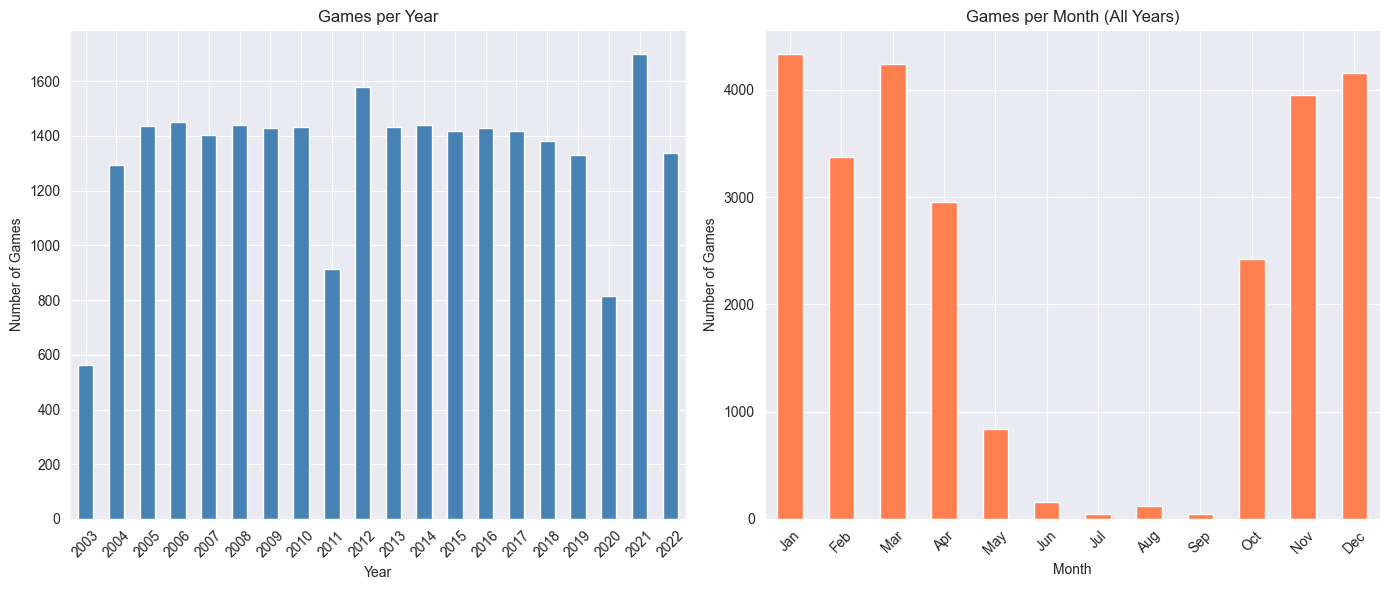


Total games: 26,651
Years covered: 2003 - 2022
Average games per year: 1333


In [8]:
# Games over time
df['year'] = df[config.GAME_DATE_COL].dt.year
df['month'] = df[config.GAME_DATE_COL].dt.month

games_per_year = df.groupby('year').size()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
games_per_year.plot(kind='bar', color='steelblue')
plt.title('Games per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
games_per_month = df.groupby('month').size()
games_per_month.plot(kind='bar', color='coral')
plt.title('Games per Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Games')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.tight_layout()
plt.show()

print(f"\nTotal games: {len(df):,}")
print(f"Years covered: {df['year'].min()} - {df['year'].max()}")
print(f"Average games per year: {games_per_year.mean():.0f}")

## 5. Team Analysis

In [9]:
# Number of unique teams
unique_home = df[config.HOME_TEAM_COL].nunique()
unique_visitor = df[config.VISITOR_TEAM_COL].nunique()
all_teams = pd.concat([df[config.HOME_TEAM_COL], df[config.VISITOR_TEAM_COL]]).unique()

print(f"Unique home teams: {unique_home}")
print(f"Unique visitor teams: {unique_visitor}")
print(f"Total unique teams: {len(all_teams)}")

Unique home teams: 30
Unique visitor teams: 30
Total unique teams: 30


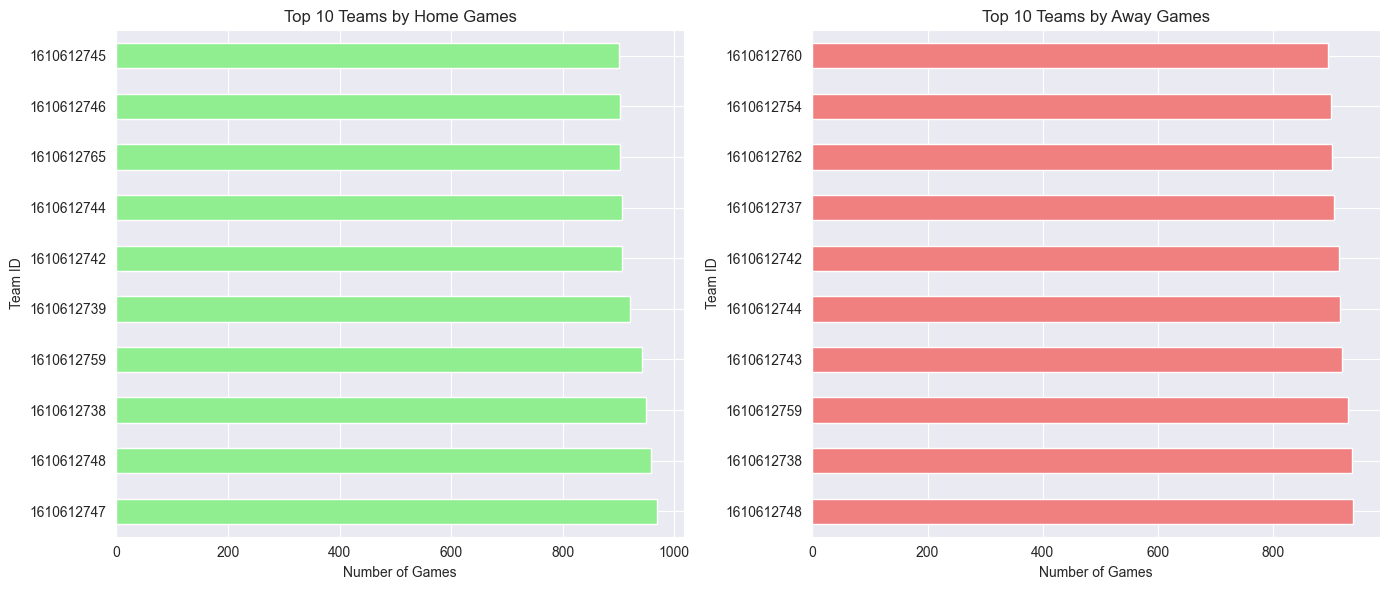


Games per team statistics:
count      30.000000
mean     1776.733333
std        59.741935
min      1603.000000
25%      1754.000000
50%      1776.500000
75%      1795.250000
max      1898.000000
Name: count, dtype: float64


In [10]:
# Games per team (home and away combined)
home_counts = df[config.HOME_TEAM_COL].value_counts()
away_counts = df[config.VISITOR_TEAM_COL].value_counts()
total_counts = (home_counts + away_counts).sort_values(ascending=False)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
home_counts.head(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 Teams by Home Games')
plt.xlabel('Number of Games')
plt.ylabel('Team ID')

plt.subplot(1, 2, 2)
away_counts.head(10).plot(kind='barh', color='lightcoral')
plt.title('Top 10 Teams by Away Games')
plt.xlabel('Number of Games')
plt.ylabel('Team ID')

plt.tight_layout()
plt.show()

print(f"\nGames per team statistics:")
print(total_counts.describe())

## 6. Target Variable Analysis (Home Advantage)

In [11]:
# Create home_win label
df['home_win'] = (df[config.HOME_PTS_COL] > df[config.AWAY_PTS_COL]).astype(int)

# Check for ties
ties = (df[config.HOME_PTS_COL] == df[config.AWAY_PTS_COL]).sum()
print(f"Number of tied games: {ties}")

# Home win statistics
home_wins = df['home_win'].sum()
away_wins = len(df) - home_wins - ties
home_win_rate = df['home_win'].mean()

print(f"\nHome wins: {home_wins:,} ({home_win_rate:.1%})")
print(f"Away wins: {away_wins:,} ({away_wins/len(df):.1%})")
print(f"Expected home advantage: 55-60%")

Number of tied games: 0

Home wins: 15,645 (58.7%)
Away wins: 11,006 (41.3%)
Expected home advantage: 55-60%


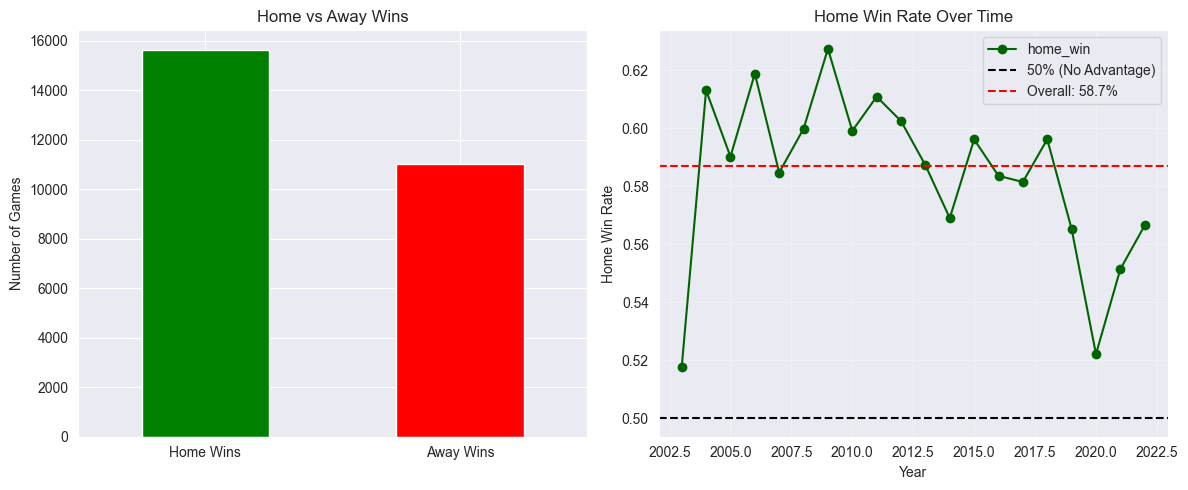

In [12]:
# Visualize home/away wins
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
win_counts = pd.Series({'Home Wins': home_wins, 'Away Wins': away_wins})
win_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Home vs Away Wins')
plt.ylabel('Number of Games')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
# Home win rate over time
home_win_by_year = df.groupby('year')['home_win'].mean()
home_win_by_year.plot(kind='line', marker='o', color='darkgreen')
plt.axhline(y=0.5, color='black', linestyle='--', label='50% (No Advantage)')
plt.axhline(y=home_win_rate, color='red', linestyle='--', label=f'Overall: {home_win_rate:.1%}')
plt.title('Home Win Rate Over Time')
plt.ylabel('Home Win Rate')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Score Distribution Analysis

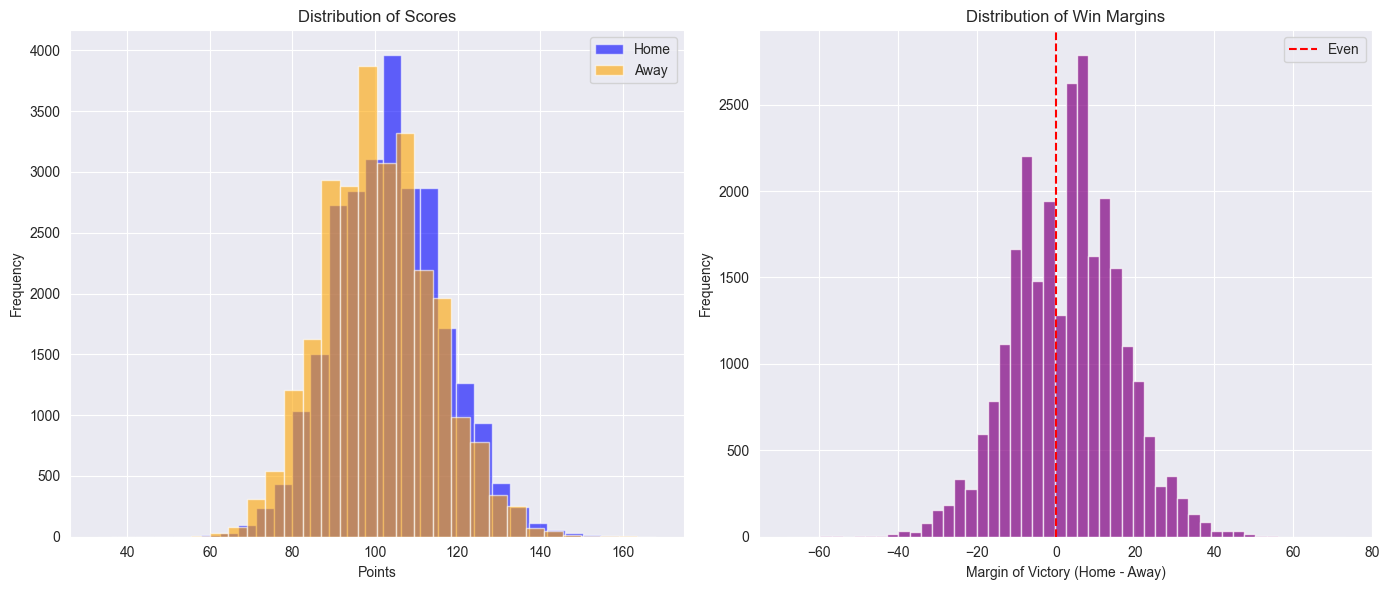

Score Statistics:
Home points - Mean: 103.5, Std: 13.3
Away points - Mean: 100.6, Std: 13.4

Win Margin Statistics:
count    26552.000000
mean         2.816021
std         13.518816
min        -68.000000
25%         -7.000000
50%          4.000000
75%         11.000000
max         73.000000
Name: margin, dtype: float64


In [13]:
# Distribution of scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df[config.HOME_PTS_COL], bins=30, alpha=0.6, label='Home', color='blue')
plt.hist(df[config.AWAY_PTS_COL], bins=30, alpha=0.6, label='Away', color='orange')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.legend()

plt.subplot(1, 2, 2)
df['margin'] = df[config.HOME_PTS_COL] - df[config.AWAY_PTS_COL]
plt.hist(df['margin'], bins=50, color='purple', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Even')
plt.xlabel('Margin of Victory (Home - Away)')
plt.ylabel('Frequency')
plt.title('Distribution of Win Margins')
plt.legend()

plt.tight_layout()
plt.show()

print("Score Statistics:")
print(f"Home points - Mean: {df[config.HOME_PTS_COL].mean():.1f}, Std: {df[config.HOME_PTS_COL].std():.1f}")
print(f"Away points - Mean: {df[config.AWAY_PTS_COL].mean():.1f}, Std: {df[config.AWAY_PTS_COL].std():.1f}")
print(f"\nWin Margin Statistics:")
print(df['margin'].describe())

C:\Users\andre\AppData\Local\Temp\ipykernel_122524\187324870.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=score_data, x='Location', y='Points', palette=['lightblue', 'lightcoral'])


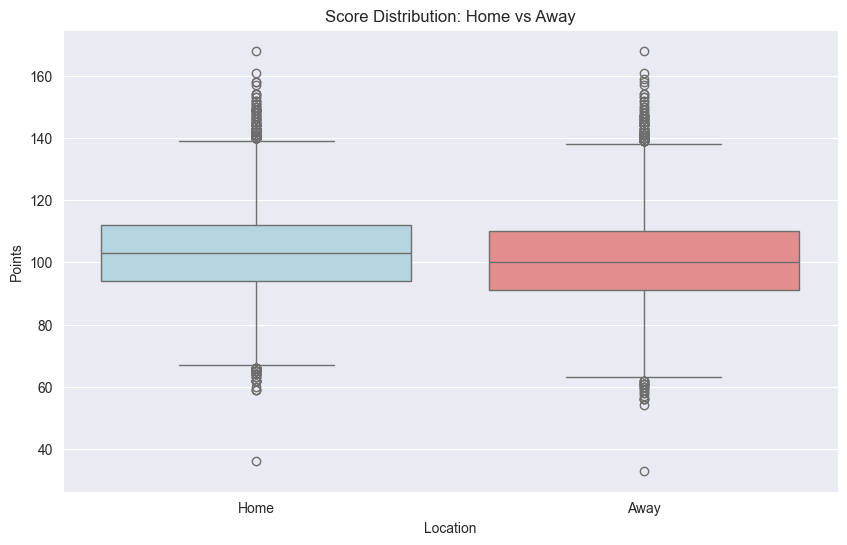

In [15]:
# Box plots for score comparison
plt.figure(figsize=(10, 6))
score_data = pd.DataFrame({
    'Points': pd.concat([df[config.HOME_PTS_COL], df[config.AWAY_PTS_COL]],ignore_index=True),
    'Location': ['Home'] * len(df) + ['Away'] * len(df)
})
sns.boxplot(data=score_data, x='Location', y='Points', palette=['lightblue', 'lightcoral'])
plt.title('Score Distribution: Home vs Away')
plt.show()

## 8. Insights Summary

In [16]:
print("="*60)
print("EDA INSIGHTS SUMMARY")
print("="*60)

print(f"\n1. Dataset Size: {len(df):,} games")
print(f"   - Date range: {df[config.GAME_DATE_COL].min().date()} to {df[config.GAME_DATE_COL].max().date()}")
print(f"   - Number of teams: {len(all_teams)}")

print(f"\n2. Data Quality:")
if len(missing_df) > 0:
    print(f"   - Some missing values found (see details above)")
else:
    print(f"   ✓ No missing values in required columns")

print(f"\n3. Home Advantage:")
print(f"   - Home win rate: {home_win_rate:.1%}")
if home_win_rate > 0.55:
    print(f"   ✓ Clear home advantage detected")
else:
    print(f"   ⚠ Home advantage lower than expected")

print(f"\n4. Class Balance:")
if 0.45 <= home_win_rate <= 0.65:
    print(f"   ✓ Relatively balanced (home: {home_win_rate:.1%}, away: {1-home_win_rate:.1%})")
else:
    print(f"   ⚠ Imbalanced dataset")

print(f"\n5. Scores:")
print(f"   - Average home score: {df[config.HOME_PTS_COL].mean():.1f} points")
print(f"   - Average away score: {df[config.AWAY_PTS_COL].mean():.1f} points")
print(f"   - Average margin: {df['margin'].mean():.1f} points")

print(f"\n6. Readiness for Modeling:")
print(f"   ✓ Sufficient data for train/test split")
print(f"   ✓ Clean target variable (home_win)")
print(f"   ✓ Ready to proceed with baseline model")

print("\n" + "="*60)

EDA INSIGHTS SUMMARY

1. Dataset Size: 26,651 games
   - Date range: 2003-10-05 to 2022-12-22
   - Number of teams: 30

2. Data Quality:
   - Some missing values found (see details above)

3. Home Advantage:
   - Home win rate: 58.7%
   ✓ Clear home advantage detected

4. Class Balance:
   ✓ Relatively balanced (home: 58.7%, away: 41.3%)

5. Scores:
   - Average home score: 103.5 points
   - Average away score: 100.6 points
   - Average margin: 2.8 points

6. Readiness for Modeling:
   ✓ Sufficient data for train/test split
   ✓ Clean target variable (home_win)
   ✓ Ready to proceed with baseline model



## Next Steps

Based on this EDA:
1. **Data is ready** for preprocessing and modeling
2. **Home advantage exists** (~59% win rate) - baseline should capture this
3. **Time-based split** is critical to prevent leakage
4. **Baseline features**: One-hot encoded team IDs
5. **Future improvements**: Add season, rolling stats, rest days